# Advance Classification Solution
### EDSA - Climate Change Belief Analysis 2022 
#### RecycleStats Solutions - Team 12 EDSA

© Explore Data Science Academy

<img src="https://imgs.search.brave.com/m-StEIqAor6PejzhO1QIqVfwYFP4znrfECo0PNzDdcM/rs:fit:1200:788:1/g:ce/aHR0cHM6Ly90YXVi/bWFuY29sbGVnZS51/bWljaC5lZHUvc2l0/ZXMvZGVmYXVsdC9m/aWxlcy9zdHlsZXMv/Zm91cl9jb2x1bW5f/ZmVhdHVyZS9wdWJs/aWMvZmVhdHVyZWRf/aW1hZ2VzL0NsaW1h/dGUtQ2hhbmdlLUZl/YXJzXzAuanBnP2l0/b2s9VTVpc2hrQXI" width=100%/> 

<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>

    1.1 Overview
    1.2 Problem Statement
    1.3 Instruction
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Collect Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
    4.1 Missing Data Check
    4.2 Target Distribution Visualization

<a href=#five>5. Data Processing</a>
    
    5.1 Text Cleaning
    5.2 Futher Data Exploration
    5.3 Tokenization
    5.4 Remove Stopwods
    5.5 Stemmig & Lemming Tokens
    5.6 Text Feature Extraction
    5.7 WordCloud

<a href=#six>6. Feature Engineering</a>

<a href=#seven>7. Modelling</a>
    
    7.1 Set Classifer
    7.2 Build Model Function
    7.3 Execute Classifer

<a href=#eight>8. Model Performance</a>
    
    8.1 Model Test Scores
    8.2 Best Model Resolution
    8.3 Hypertunning Best Model
    8.4 Best Model Confusion Matrix

<a href=#nine>9. Saving & Exporting Model</a>
    
    9.1 Export Test Prediction as CSV
    9.2 Log to Comet

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### 1.1 Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Hence, We will be creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### 1.2 Problem Statement

We are looking to Empower the marketing sector of Eco-Friendly Companies, helping them maximise productivity, driving profitability by knowledge of the demand & Supply on her goods & Services. 

### 1.3 Instruction

#### 1.3.1 Model Versioning with COMET
To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.

If you don't have a commet Accout, Go ahead to create an individual account, visit https://www.comet.ml/  You will see a project folder. That is where the records of your experiments can be viewed.

You should install as illustrated below if you don't already have it. Always import Experiment at the top of your notebook/script. (Always install if on Google Colab).

In [1]:
# Install Comet
# !pip install comet_ml

In [2]:
# Import Comet package
from comet_ml import Experiment

# Setting the API key (saved as environment variable)
"""
Go ahead and get your api_key, project_name & workspace from your
Comet Project Folder.
"""
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
    project_name="team-12-advanced-classification-sentiment-analysis",
    workspace="jeniffermukami",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/163c00c25f8e4489a22921daa11b52ac



####  1.3.2 Ensure you've got NLTK Corpora installed
Some of the `nltk` text processing involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, first download the corpora we're going use if you don't have it installed, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

You should see this pop-up box. 

**NOTE:** the box might pop-up in the backround, in which case you should use `alt + tab` to switch to the downloader window.

<img src="https://github.com/Explore-AI/Pictures/blob/master/nltk_downloader.png?raw=true" width=25%/> 

Use it to navigate to the item we need to download: 
- stopwords corpus (Corpora tab)
- punkt tokenizer models (Models tab)

Navigate to these, click the download button, and exit the downloader when finished.

###### An additional Installation Required to run this Notebook Analysis Effectively

`Word Cloud:`
Important System Requirement: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/

In th Visual Studio Installer, Install `Deskstop Development with C++`. On completing this, Run on Command Prompt or Notebook `pip install wordcloud`
    
    Installing collected packages: wordcloud
    Running setup.py install for wordcloud ... done
    Successfully installed wordcloud-1.8.1

In [3]:
''' If you don't have it Installed, Remove Hashtag to Run'''
# !pip install wordcloud

" If you don't have it Installed, Remove Hashtag to Run"


`Imblearn:` Required while handling Class Imbalance 

In [4]:
# Install imblern lib if you don't have the package intalled
# !pip install imblearn

In [5]:
# For a more Summarized EDA install Panda Profiling
# !pip install pandas-profiling

So, Let's Proceed

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [6]:
""" For seamless run, Import All required libraries here """

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # for loading CSV data
import numpy as np                                                    # Used for mathematical operations
import matplotlib.pyplot as plt                                       # for Graphical Representation
#%matplotlib inline                                                    
import seaborn as sns                                                 # for specialized plots
import re                                                             
import math 
import string
sns.set()                                                             # set plot style

# Libraries for data preparation
import nltk
from nltk.tokenize import TweetTokenizer
from nltk import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from statsmodels.graphics.correlation import plot_corr                # To plot correlation heatmap
from pandas_profiling import ProfileReport   #Panda Profiling for EDA

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   

# Libraries for Model Building
from sklearn.model_selection import train_test_split                  # To split the data into training and testing data
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score                # To split the data into training and testing data
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Libraries for calculating performance metrics
from sklearn import metrics                                           # for
from sklearn.metrics import accuracy_score, recall_score, precision_score 
from sklearn.metrics import  classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
import time

# Libraries to Save/Restore Models
import pickle

# Setting global constants to ensure notebook results are reproducible


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [7]:
'''
if you don't have installed, the NLTK corpora, Remove Hashtag below and Run 
IF NOT, JUST PASS
'''
#nltk.download()

"\nif you don't have installed, the NLTK corpora, Remove Hashtag below and Run \nIF NOT, JUST PASS\n"

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>

Data is required to help you find a solution to your data science problem. The data will provide insights that will lead you to a solution.

The collection of the data used for this analysis was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo, and made available by the EXPLORE Data Science Academy (EDSA) in challenging us during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. 

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.

In [8]:
# Load Data
df_train = pd.read_csv('train.csv')
df_test =pd.read_csv('test_with_no_labels.csv')

In [9]:
# View Dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [10]:
# Lets see the shape of our Dataset.
print(f'No. of Tweets on our TRAIN dataset: {df_train.shape}')
print(f'No. of Tweets on our TEST dataaet: {df_test.shape}')

No. of Tweets on our TRAIN dataset: (15819, 3)
No. of Tweets on our TEST dataaet: (10546, 2)


In [11]:
# printing a list of all sentiment types we have in our data.
type_labels = list(df_train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


We have available for training and Test our model, `15819 Tweets` & `10546 Tweets` respectively as seen above. Each tweet labelled, represents one of the following classes:

Class Description
*  2 **News:**     The tweet links to factual news about climate change
*  1 **Pro:**      The tweet supports the belief of man-made climate change
*  0 **Neutral:**  The tweet neither supports nor refutes the belief of man-made climate change
* -1 **Anti:**     The tweet does not believe in man-made climate change

Variable definitions
- **sentiment:** Sentiment of tweet
- **message:**   Tweet body
- **tweetid:**   Twitter unique id

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

Hence, let's proceed to carrying out some EDA

#### 4.1 Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning things like; NO MISSING DATA in each observation.

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The info command reveals presence of `Categorical` and `Numerical` features in our dataset, and as expected the message feature is categorical while the tweetid and sentiment are numerical. All features seem to have `Zero Non-Null` values. let's check to confirm count of null values present in each feature.

In [13]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This Confirms; `No Missing Values in our Dataset`. It's important that our train data is as ideal as possible so that our model will fully undrstand the influence of each feature per observation feed to it.

#### 4.2 Target Distribution Visualization

Let's Visualize the distribution of our Target Response within our Training DataSet i.e. how many data samples we have for each of the different sentiment types

In [14]:
# Let's see the count of observations per lan_id
df_train.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

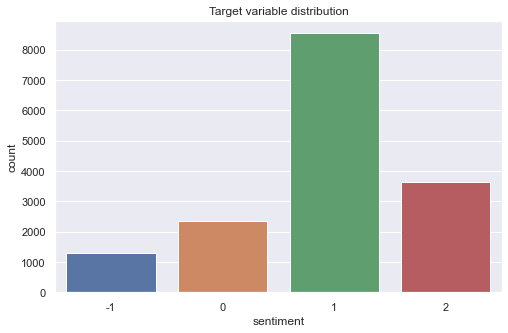

In [15]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(df_train['sentiment'])
plt.title('Target variable distribution')
plt.show()

From the Sentiment Distribution, we can clear see a High level of `Class Imbalance` which is when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. Hence we will trying out varying techniques to `Downsampling` the majority class to even off with the minority or `Upsampling` which is the reverse of Downsampling. We look to Trying the following
- Smote
- Oversampling
- Undersampling ...

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

Let's get the data and clean it up a bit

### 5.1 Text Cleaning

In [16]:
# First we View Data in MESSAGE COlumns
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(5)

0    PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable
1    It's not like we lack evidence of anthropogenic global warming                                                                              
2    RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3    #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                         
4    RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                  
Name: message, dtype: object

#### 5.1.1 Remove Noise
From the content in our Message column, its imperative that we commence Text cleaning our data, of which we will first need to remove the noises in our text. 

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format

For our data set we will follow the following steps 
 * removing Removing Url / links, hashtags and mentions
 * making everything lower case
 * removing punctuation

The url is mainly the shortened version which contains no information of the context of it's address. Further insights can be drawn by search for keyword or phrases present in those address, but for the scope of this project, we will limit our cleaning to replacing it with `'url-web'` , Reason being `So we can observe how tweets with links correlates with sentiments`

In [17]:
# First we Define function that handles text cleaning
def clean_text(text):
    """
    This function uses regular expressions to 
        - remove links characters
        - remove html characters,
        - remove escape sequences,
        - remove capitalization,
        - any extra white space from each text and then converts them to lowercase.

    Input:
    text: original text
          datatype: string

    Output:
    texts: modified text
           datatype: string
    """
    # replace links with url-web
    pattern_url = 'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = 'url-web'
    text = re.sub(pattern_url, subs_url, text)
    # replace the html characters with " "
    text = re.sub('<.*?>', ' ', text)
    # replace escape sequence with space
    escape_seq = ["\r", "\n",'\a', '\b', '\f', "\`", '\”', '\t']
    for i in escape_seq:
        text = re.sub(i, " ", text)
    # Remove Capitalization
    text = text.lower()
    # plit and join the words
    text=' '.join(text.split())
    
    return text

In [18]:
# Applying function to clean text feature
df_train['message'] = df_train['message'].apply(clean_text)
df_test['message'] = df_test['message'].apply(clean_text)

In [19]:
# Let's view the MESSAGE created
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(8)

0    polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable            
1    it's not like we lack evidence of anthropogenic global warming                                                                          
2    rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…                        
3    #todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web                                                     
4    rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight              
5    worth a read whether you do or don't believe in climate change url-web url-web                                                          
6    rt @thenation: mike pence doesn’t believe in global warming or that smoking causes lung cancer. url-web                                 
7    r

**Observation**

- Links replaced with url-web
- Escape sequence converts `\n\nTrump's` to `Trump's`As seen in `index line 13:` . SEE Refernce below to read up more.
- removal of capitalisation noise archieved. 
- We still have punctuations and characters such as `@` to remove. 

#### 5.1.2 Remove Punctuation 
Punctuation is the set of marks used to regulate texts and clarify their meanings, mainly by separating or linking words, phrases, and clauses.

While our models needs keywords or phrases to classify, puntuations may become redundant, so we can remove it.

In [20]:
# Define a function to handle punctuation removal
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [21]:
# Remove Punctutaion Noise
df_train['message'] = df_train['message'].apply(remove_punctuation)
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [22]:
# Verify Actions
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['message'].head(15)

0     polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable                   
1     its not like we lack evidence of anthropogenic global warming                                                                          
2     rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…                           
3     todayinmaker wired  2016 was a pivotal year in the war on climate change urlweb                                                        
4     rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight                     
5     worth a read whether you do or dont believe in climate change urlweb urlweb                                                            
6     rt thenation mike pence doesn’t believe in global warming or that smoking causes lung cancer urlweb                                    
7     

NOTE; Three kind of challanges still persist; We can further tackle

ASL fingerspelling, such as `ã¢â‚¬â¦` , lines `7`, `10` and so on

Text wrapped in  example `‘dangerous’` and `‘misled’`, lines 12 & 14 resp.

Thirdly, continoius dots e.g `warming………` and `urlweb…` lines `9` and `12` resp. and so on

But for now let's Proceed to Tokenization

#### 5.2 Further Data Exploration

For a more generalized overview of our dataset in other to gai further insight let's apply the Profile Report fuction.

In [23]:
# Let's get an Overview of progress and areas of interest
profile = ProfileReport(df_train, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Let's further dive down into understanding the influencing words, characters etc.

NOTE: However, For this model we will be applying the CountVectorizer or TfidfVectorizer for the Text engineering, but for insight and further review, let's go on to tokenize, remove stop-words, stem, and lemmatize our message. Any insight will prove useful in understanding the data we are dealing with.

### 5.3 Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.

In [24]:
# Apply the tweet tokenization
tokenizer = TweetTokenizer()
df_train['tokens'] = df_train['message'].apply(tokenizer.tokenize)

In [25]:
# Check
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
print(df_train['message'].iloc[10000])
print(df_train['tokens'].iloc[10000])

the washington post lies nonstop like this as trump halts fed action on climate change cities amp states push on urlweb
['the', 'washington', 'post', 'lies', 'nonstop', 'like', 'this', 'as', 'trump', 'halts', 'fed', 'action', 'on', 'climate', 'change', 'cities', 'amp', 'states', 'push', 'on', 'urlweb']


### 5.4 Remove Stop words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.   `nltk` has a corpus of stopwords. We will be using the stopwords for `English.`

In [26]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

df_train['tokens'] = df_train['tokens'].apply(remove_stop_words)

### 5.5 Stemming & Lemming Tokens

Stemming is the process of transforming to the root word. It uses an algorithm that removes
common word-endings from English words, such as “ly,” “es,” “ed,” and “s.” 

For example, assuming for an analysis you may want to consider “carefully,” “cared,” “cares,” “caringly” as “care” instead of separate words. There are three widely used stemming algorithms, namely:
* Porter  (Most common, Least aggreasive)
* Lancaster (Very aggressive stemming algorithm)
* Snowball  (Moderately aggressive)

Out of these three, we will be using the `SnowballStemmer`.

Lemmatization

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

Sometimes you will wind up with a very similar word, but other times you will wind up with a completely different word.

In [27]:
#Stemming the tokenized tweets using snowball stemmer

stemmer = SnowballStemmer('english')

def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

df_train['stem'] = df_train['tokens'].apply(df_stemmer, args=(stemmer, ))

Print off the results of the stemmer to see what we have done.

In [28]:
for i, t in enumerate(df_train.iloc[10000]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[10000]['stem'][i]))

washington           --> washington
post                 --> post      
lies                 --> lie       
nonstop              --> nonstop   
like                 --> like      
trump                --> trump     
halts                --> halt      
fed                  --> fed       
action               --> action    
climate              --> climat    
change               --> chang     
cities               --> citi      
amp                  --> amp       
states               --> state     
push                 --> push      
urlweb               --> urlweb    


In [29]:
# Lemming the tokenized tweets using WordNetLemmatizer

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]
df_train['lemma'] = df_train['tokens'].apply(df_lemma, args=(lemmatizer, ))

In [30]:
# Check for lemma
for i, t in enumerate(df_train.iloc[10000]['tokens']):    
    print ('{:20s} --> {:10s}'.format(t, df_train.iloc[10000]['lemma'][i]))

washington           --> washington
post                 --> post      
lies                 --> lie       
nonstop              --> nonstop   
like                 --> like      
trump                --> trump     
halts                --> halt      
fed                  --> fed       
action               --> action    
climate              --> climate   
change               --> change    
cities               --> city      
amp                  --> amp       
states               --> state     
push                 --> push      
urlweb               --> urlweb    


### 5.6 Text feature extraction

`Still Remember!!!`
This is for Insight purposes. `CountVectorizer` handles all this.

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect `dict` style feature sets, so we must therefore transform our text into a `dict`.


In [31]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [32]:
# Next create a set of dictionaries, one for each of the sentiment types.
type_labels = list(df_train.sentiment.unique())
sentiments = {}
for pp in type_labels:
    df = df_train.groupby('sentiment')
    sentiments[pp] = {}
    for row in df.get_group(pp)['tokens']:
        sentiments[pp] = bag_of_words_count(row, sentiments[pp])    

In [33]:
# Next, we create a list of all of the unique words.
all_words = set()
for pp in type_labels:
    for word in sentiments[pp]:
        all_words.add(word)

`UNDERSTAND:  This was done so that we can create a combined bag of words dictionary for all the words in the text.`

These words then serve as features by which the model seeing a combination of some will classify the sentiment of each Text observation. Before being feed to the model, they are being dummy encoded for the computer to understand. Also, words or features with lesser influence can be dropped too as part of feature selection. you can read up on this as regards classifiaction.

In [34]:
# create a combined bag of words dictionary
sentiments['all'] = {}
for pp in type_labels:    
    for word in all_words:
        if word in sentiments[pp].keys():
            if word in sentiments['all']:
                sentiments['all'][word] += sentiments[pp][word]
            else:
                sentiments['all'][word] = sentiments[pp][word]

Now we can easily calculate how many words there are in total.

In [35]:
total_words = sum([v for v in sentiments['all'].values()])
total_words

222785

This reveals that it will be a wiser option to Oversample rather than undersample when dealing with Class imbalance as our model will definately work better with more train observation / dataset.

Text(0.5, 0, 'word frequency')

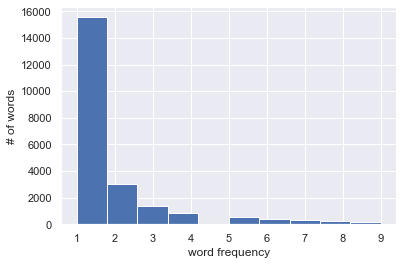

In [36]:
# Let's take a look at the distribution of words which occur less than 10 times in the whole dataset.
_ = plt.hist([v for v in sentiments['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency")

There Appear a lot of words that only appear once! We'll print out that value here.

In [37]:
# words that only appear once!
len([v for v in sentiments['all'].values() if v == 1])

15551

In [38]:
# Visualize a few of these rare words.
rare_words = [k for k, v in sentiments['all'].items() if v==1] 
print(rare_words[:100])

['preparing', 'defrauding', 'wildflowers', 'facesofchange', 'rgjones', 'maryreinhardt', 'protestworks', 'changeampadmin', 'femabrock', 'indiewashere', 'healthlives', 'janecaro', 'itoh', 'makeourplanetgreatag', 'possession', 'fixable', 'thetylt', 'saboceano', 'kalaax', 'successfully', 'disqualifies', 'aspentroll', 'liarsneverwin', 'ivanadomic', 'seal', 'russelnorman', 'refus', 'hanniejene', 'diorwhore', 'chriswarcraft', 'jenniferludden', 'talhas', 'thw', 'openp', 'semiserious', 'fansã', 'socia', 'huffpostuktech', 'subscribe', 'gtgtgt', 'changehoax', '745', '56000', 'ddollarbill', 'tomburke', 'louonthesubway', 'lippard', 'dilling', 'pareto', 'magsmcm', 'dataviz', 'iandunt', 'mechanisms', 'cycleoakville', 'watchã', '🌱', 'seychelles', 'langbanks', 'ourheroiszer', 'devils', 'bikeportland', 'ushered', 'fiery', 'incredulouswhat', 'tarsands', 'kirbsp', 'standindivisible', '3121', 'davidallengreen', 'alexarapp', 'physicians', 'unamerican', 'iamaclimatechangedenier', 'windpower', 'jamessurowieck

As you can see, `SOME` of these words don't make sense, some do, but before we make any ddecision wether to keep or remove any of these, `let's see how much data we'll be left with.`

In [39]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print({len([v for v in sentiments['all'].values() if v >= 10])})
occurs_more_than_10_times = sum([v for v in sentiments['all'].values() if v >= 10])
print(f'Occurs more than 10 times:  {occurs_more_than_10_times} out of the total words (222785)')
print(f'In Percentage = {round((occurs_more_than_10_times/total_words)*100, 1)} %' )

{2414}
Occurs more than 10 times:  181971 out of the total words (222785)
In Percentage = 81.7 %


Using words that appear more than 10 times seems much more useful!  And this accounts for `81.7%` of all the words!

Finally, We can move  to removing all words that occur less than 10 times.

In [40]:
# Re-bag all words upto 10 times occurance. let the models focus more on this words
max_count = 10
remaining_word_index = [k for k, v in sentiments['all'].items() if v > max_count]

In [41]:
# Remove Hash to view print
# print(remaining_word_index)

Like said earlier; At this point, we can do more feature engineering and hypothesis testing then we dummy encode the variables before making it ready for the model training. This was done in our version 3.0 of our Notebook but the CountVectorizer proves much better when modelling.

NOW, let's visualize the Tokens with the most sentiment using `WordCloud`. word Cloud for the various sentiments: Anti_Belief(-1), Neutral_Belief(0), Belief_Man_Made_Cause(1) and Factual_News(2). 

#### 5.7 WordCloud

Text(0.5, 1.0, 'Strong Sentiment (Tweets links to Factual News about climate change)')

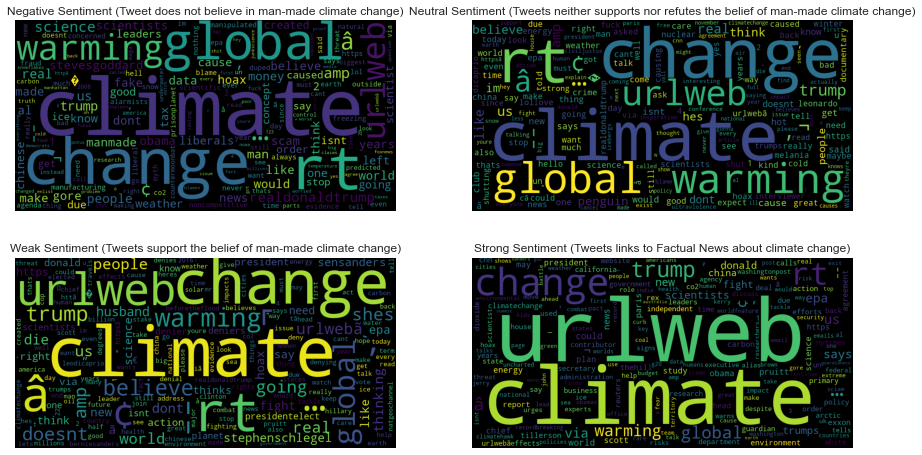

In [42]:
from PIL import Image
from wordcloud import WordCloud 

# RUN WORDCLOUD
Anti_Belief = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[-1])
Neutral_Belief = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[0])
Belief_Man_Made_Cause = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[1])
Factual_News = WordCloud(width = 1000, height = 500).generate_from_frequencies(sentiments[2])

#Create a canvas
fig = plt.figure(figsize=(15,8))
# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
# showing image
plt.imshow(Anti_Belief)
plt.axis('off')
plt.title("Negative Sentiment (Tweet does not believe in man-made climate change)")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
# showing image
plt.imshow(Neutral_Belief)
plt.axis('off')
plt.title("Neutral Sentiment (Tweets neither supports nor refutes the belief of man-made climate change)")

# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
# showing image
plt.imshow(Belief_Man_Made_Cause)
plt.axis('off')
plt.title("Weak Sentiment (Tweets support the belief of man-made climate change)")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
# showing image
plt.imshow(Factual_News)
plt.axis('off')
plt.title("Strong Sentiment (Tweets links to Factual News about climate change)")

From the WordCloud; 
- You can see that, the more URLs in the tweets, the higher the sentiments about climate change.
- we can see "Chang" and "climat" has the highest frequency in all the sentiments hence they will be purged in the data engineering section because they contribute nothing to the model. 

<a id="six"></a>
## 6. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

This involves preparations to make ready our data to serve those structured selected features to models upon request.

In [119]:
vect = CountVectorizer(min_df=1, max_df=0.5, ngram_range=(1, 3))

In [120]:
# First features and label 
X = vect.fit_transform(df_train['message'])
y = df_train['sentiment']

In [121]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

ct = Counter(y)
print('Before: ', ct)
# Oversampling using SMOTE only
# sm = SMOTE(random_state = 53)
# X_stm, y_stm = sm.fit_resample(X, y)

# Oversampling the train dataset using SMOTE + Tomek
# stm = SMOTETomek(random_state = 53)
# X_stm, y_stm = stm.fit_resample(X, y)

# Oversampling the train dataset using SMOTE + Enn
stm = SMOTEENN(random_state = 53)
X_stm, y_stm = stm.fit_resample(X, y)

ct2 = Counter(y_stm)
print('Before: ', ct2)

# Then deal with Class Imbalance
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state = 53)
# X_stm, y_stm = sm.fit_resample(X, y)

Before:  Counter({1: 8530, 2: 3640, 0: 2353, -1: 1296})
Before:  Counter({2: 5352, 0: 4010, -1: 3597, 1: 1512})


In [122]:
# split data to Train/Test set
X_train, X_val, y_train, y_val = train_test_split(X_stm, y_stm, test_size=0.1, random_state=53)

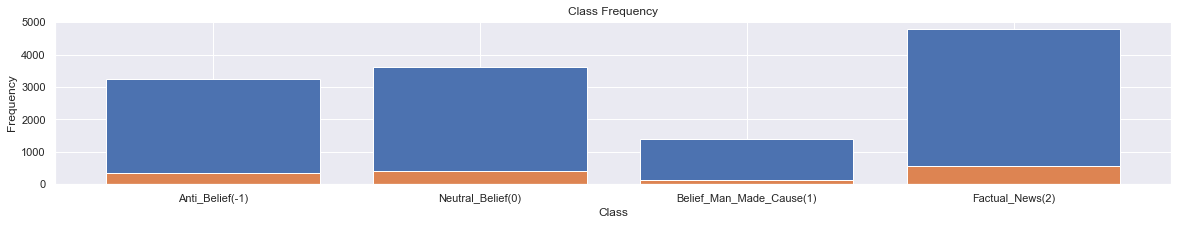

 2    4797
 0    3607
-1    3236
 1    1383
Name: sentiment, dtype: int64

In [123]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_val, return_counts=True)
plt.bar(unique, counts)

plt.rcParams["figure.figsize"] = (20, 3)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[-1, 0, 1, 2], 
           labels=['Anti_Belief(-1)', 'Neutral_Belief(0)', 'Belief_Man_Made_Cause(1)', 'Factual_News(2)'])

plt.show()
y_train.value_counts()

Before we move on, let's take a look at the distribution of observations between our classes.

The Effect of Class imbalance can be devasteting to our model performance.

let's proceed to initializing and fitting and training our model

<a id="seven"></a>
## 7. Modeling
<a href=#cont>Back to Table of Contents</a>

#### 7.1 Set Classifier

In [124]:
"""
You can go ahead to adding to try other models
this list of classifiers
"""

classifiers = [LinearSVC(),
               
               #SVC(),
               
               MultinomialNB(),
               
               ComplementNB(),
               
               LogisticRegression(),
               
               #RandomForestClassifier(max_depth = 25, random_state = 42),
               
               #KNeighborsClassifier(n_neighbors=5),
               
               #SGDClassifier(loss='hinge',
#                              penalty='l2',
#                              alpha=1e-3,
#                              random_state=42,
#                              max_iter=5,
#                              tol=None)
               ]

#### 7.2 Build Model function

In [125]:
def models_building(classifiers, X_train, y_train, X_val, y_val):
    """
    This function takes in a list of classifiers and both the train and validation sets
    and return a summary of F1-score and processing time as a dataframe

    Input:
    classifiers: a list of classifiers to train
                 datatype: list
    X_train: independent variable for training
                 datatype: series
    y_train: dependent variable for training
                 datatype: series
    X_val: independent variable for validation
                 datatype: series
    y_val: dependent variable for validation
                 datatype: series

    Output:
    model_summary: F1 Score for all the classifiers
                 datatype: dataframe
    """

    models_summary = {}

    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_para = Pipeline([#('countV', CountVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_para.fit(X_train, y_train)
        predictions = clf_para.predict(X_val)
        run_time = time.time() - start_time

        # Score output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_val, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

#### 7.2 Execute Classifier

In [126]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)

NOW; We have Oversampled our dataset using the SMOTE method. Note that this was applied only to the training dataset and the Test set (in red) remains untouched to act for as unseen/ Real world data.

<a id="eight"></a>
## 8. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>

Here will be reviewing the individual performance of our machine learning model and why to use one in place of the other

### 8.1 Model Testing Scores


In [127]:
df = classifiers_df.sort_values('F1-Macro', ascending=False)
df

,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
LinearSVC,0.973367,0.972376,0.972399,12.602231
LogisticRegression,0.970068,0.968232,0.968243,46.443138
MultinomialNB,0.756693,0.762431,0.725163,0.094942
ComplementNB,0.733560,0.757597,0.728190,0.112930


**Applied Smote**

    `F1-Macro	F1-Accuracy	F1-Weighted	Execution Time`
    
`LogisticRegression	0.722713	0.724502	0.721954	60.517860`

`LinearSVC	0.710561	0.712192	0.709995	57.959298`

`ComplementNB	0.593131	0.619578	0.594068	0.146911`

`MultinomialNB	0.571666	0.592028	0.573167	0.133914`

**Third Result Cap**

    `F1-Macro	F1-Accuracy	F1-Weighted	Execution Time`
    
`LogisticRegression	0.663574	0.754741	0.740717	30.850014`

`LinearSVC	0.656456	0.744627	0.734539	17.639130`

`ComplementNB	0.617780	0.727560	0.701489	2.544434`

`MultinomialNB	0.520984	0.702276	0.651711	3.227008`

**Second Result Cap:**

    `F1-Macro	F1-Accuracy	F1-Weighted	Execution Time`
    
`LinearSVC	0.650044	0.747155	0.736875	17.716033`

`LogisticRegression	0.639770	0.753477	0.737390 31.279656`

`ComplementNB	0.600621	0.737674	0.708040	2.326563`

`MultinomialNB	0.499809	0.710493	0.654720	2.350557`

#### 8.2 Best Model Resolution

The most performing is the Logistics Regression Model with F1-Macro of 66% and accuracy of 75.4% while closely followed by is the Linear support ector classifer. I must mention, that often times, this position flips between the two as concerning this model. 

However our earlier selected base model (Multinomial Naive Bayes) used in earlier Notebook as seen to have an Accuracy of 71% is not the best model. Naive bayes is most commonly used for testing NLP classification because of its basis in probability. it's algorithm attempts to answer the question 'Given a particular piece of data how likely is the outcome?'. Each word acts as a feature from our count vectorizer helping classify our message using probability. MultinomialNB is used for discrete counts

We will proceed with the first two algorithms (to see which will come out better) by applying hyperparameter tunining, as they are the most performing models and considering their execution time.

#### 8.3 Hypertune Best Model

The CoutVectorizer is used instead of the tfidVectorizer as performance checks in our earlier models reveals so. You can apply it and see for your self.

In [136]:
# Creating a pipeline for the gridsearch

# set parameter grid
param_grid = {'penalty': ['l1', 'l2',  'elasticnet', 'none']}  

hyper_best_model = Pipeline([('logReg', GridSearchCV(LogisticRegression(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

# Fiting data model
hyper_best_model.fit(X_train, y_train) 

# predicting the fit on validation set
y_pred = hyper_best_model.predict(X_val)  

print(classification_report(y_val, y_pred)) 

              precision    recall  f1-score   support

          -1       0.94      0.97      0.95       361
           0       0.98      0.95      0.97       403
           1       0.99      0.98      0.98       129
           2       0.98      0.98      0.98       555

    accuracy                           0.97      1448
   macro avg       0.97      0.97      0.97      1448
weighted avg       0.97      0.97      0.97      1448



In [137]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_val, y_pred), 2) * 100}''%')

Accuracy Score: 97.0%


BUT RESULT ON KAGGLE: Your submission scored 0.40327, which is not an improvement of your previous score. Keep trying!

1. first Accuracy Score: 71.0%

#### 8.4 Best Model Confusion matrix

In [138]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
pd.DataFrame(data=confusion_matrix(y_val, y_pred), index=labels, columns=labels)

,1: News,2: Pro,0: Neutral,-1: Anti
1: News,350,5,1,5
2: Pro,15,384,0,4
0: Neutral,1,0,126,2
-1: Anti,7,2,0,546


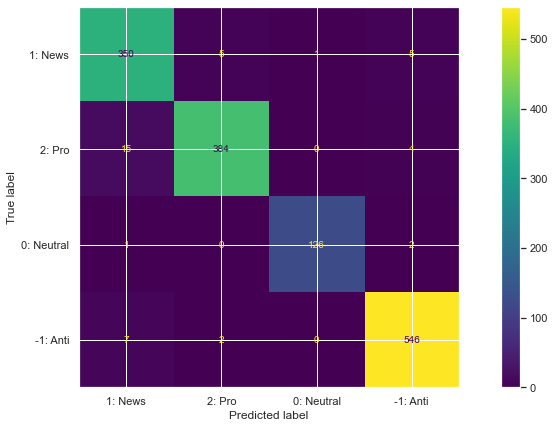

In [139]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

<a id="nine"></a>
## 9. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>

#### 9.1 Export Test Prediction as CSV

In [140]:
#counteer_test = betterVect.transform(df_test['message'])
X_test = vect.transform(df_test['message']) 
test_pred = hyper_best_model.predict(X_test)
save_df = pd.DataFrame(test_pred, columns=['sentiment'])
output=pd.DataFrame({'tweetid': df_test['tweetid']})
submission=output.join(save_df)

In [141]:
submission.to_csv('submission_10.csv', index=False)

#### 9.2 Log to Comet

In [ ]:
# Create dictionaries for the data we want to log
# This had to be defined since that applied to our model is the best from the grid search.
params ={"random_state": 53,
         "model_type ": "LinearSVC",
         "Bag of words": "count_Vectorizer",
         "min_df": 1,
         "max_df": 0.9,
         "n_grams": "(1, 2)"
        }

nb_metrics ={"Accuracy": metrics.accuracy_score(y_val, y_pred),
             "recall": metrics.recall_score(y_val, y_pred, average='micro'),
             "f1": metrics.f1_score(y_val, y_pred, average='micro'),
#              "Classification_Report": classification_report(y_val, y_pred)
            }

confusionmatrix = confusion_matrix(y_val, y_pred)
confusionmatrix

In [ ]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(nb_metrics)
experiment.log_notebook('5.0 Advance_Classification_Notebook.ipynb', overwrite=False)
experiment.log_confusion_matrix(labels=["News", "pro", "Neutral","Anti"], matrix=confusionmatrix)
experiment.log_figure('EDA', profile)

If you're using comet within a jupyter notebook, it's important to end your experiment when you've finished as illustrated below.

In [ ]:
# STRICTLY FOR LOCAL JUPYTER NOTEBOOKS
# experiment.end()

In [ ]:
comet check --debug > debug.log

In [ ]:
export COMET_LOGGING_FILE=./comet-debug.log
export COMET_LOGGING_FILE_LEVEL=debug

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

So far, haven tried out several algorithm, we can thus infer that Logistics Regression classifier performed best both in the training and validation phase with an accuracy score of over 75%, representing it's ability when dealing with unforseen data. This can be further improved with time & further exposure of our model to new dataset, hence improving it's productivity.

<a id="eleven"></a>
## 11. Recommendation
<a href=#cont>Back to Table of Contents</a>

Now, we are able to Empower marketers of Eco-Friendly Companies, so they can move into integrating this model to their focused market domain, gain insight on market behaviour, maximise productivity, driving profitability by knowledge of the demand & Supply on her goods & Services.

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

* [EXPLORE Data Science Academy Resources](https://explore-datascience.net/)
* [GitHub Collab Ref.](https://github.com/)
* [Commet Collab Ref](https://www.comet.ml/) 
* [Kaggle Collab Ref](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2022/overview)
* [Escape Seqences](https://linuxconfig.org/list-of-python-escape-sequence-characters-with-examples)
* [SMOTE Oversampling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)